In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%pylab inline

import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from pyFTS.partitioners import Grid
from pyFTS.models import chen
from pyFTS.common import FLR
from pyFTS.common import Util
import numpy as np

In [3]:
data = pd.read_csv('4.csv')

data.head()

,tanggal,4h
0,1-Jan-18,92
1,2-Jan-18,121
2,3-Jan-18,157
3,4-Jan-18,201
4,5-Jan-18,175


In [4]:
data = data['4h'].values

In [5]:
fuzzy = Grid.GridPartitioner(data = data, npart = 11)

fuzzyfied = fuzzy.fuzzyfy(data, method = 'maximum', mode = 'sets')

In [6]:
model = chen.ConventionalFTS(partitioner = fuzzy)

model.fit(data)
print(model)

Conventional FTS:
A0 -> A1
A1 -> A1,A2,A3
A2 -> A1,A2,A3,A4
A3 -> A2,A3,A4,A5
A4 -> A2,A3,A4,A5,A6
A5 -> A2,A3,A4,A5,A6,A8
A6 -> A4,A5,A6,A7
A7 -> A5,A7
A8 -> A5,A9
A10 -> A8
A9 -> A10



In [7]:
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A0 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A4', 'A4 -> A3', 'A2 -> A1', 'A1 -> A1', 'A4 -> A5', 'A5 -> A4', 'A5 -> A5', 'A3 -> A5', 'A5 -> A6', 'A6 -> A5', 'A5 -> A2', 'A5 -> A3', 'A4 -> A6', 'A6 -> A6', 'A1 -> A3', 'A2 -> A4', 'A4 -> A2', 'A6 -> A4', 'A6 -> A7', 'A7 -> A7', 'A7 -> A5', 'A5 -> A8', 'A8 -> A9', 'A9 -> A10', 'A10 -> A8', 'A8 -> A5']


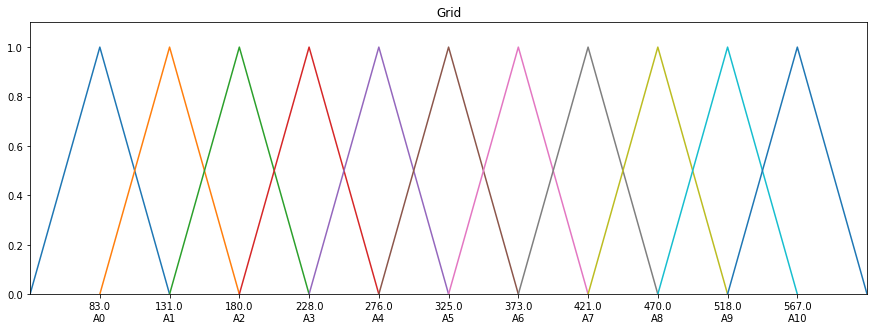

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fuzzy.plot(ax)

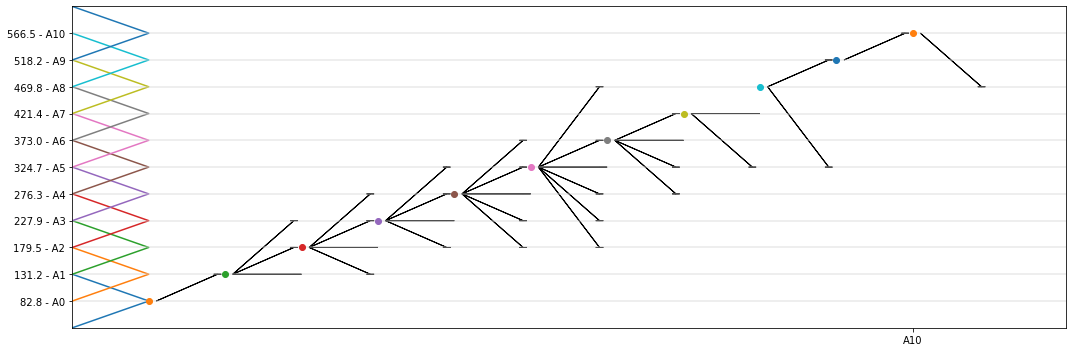

In [9]:
Util.plot_rules(model, size=[15,5], rules_by_axis=12)

In [10]:
import numpy as np

def mean_absolute_percentage_error(te, forecasts): 
    return np.mean(np.abs(((te - forecasts) / te)) * 100 )

In [11]:
dt = pd.read_csv('test.csv')
dt.drop(["t1", "t2", "t3", "t5", "t6", "t7"], axis=1, inplace=True)
dt = dt.dropna()
dt.head()

,Tanggal,t4
0,1/1/2020,318
1,2/1/2020,332
2,3/1/2020,310
3,4/1/2020,308
4,5/1/2020,244


In [12]:
pre = model.predict(dt['t4'].values)

In [13]:
mean_absolute_percentage_error(dt['t4'].values, pre)

2.4270377195680717

In [14]:
import pickle
pickle.dump(model, open('fts.pkl', 'wb'))

AttributeError: Can't pickle local object 'Partitioner.__init__.<locals>.<lambda>'